<a href="https://colab.research.google.com/github/madhumaram/microservicesfirstproject/blob/master/logistic_regression_svm_daibetes_week2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

we import pandas first and read
the file using the .read_csv() function by passing the name of the dataset we want to read as a string.

In [2]:
import pandas as pd #import the library

df = pd.read_csv("diabetes.csv") #read the dataset

In [4]:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [5]:
df.shape

(768, 9)

In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Run the code cell below to create our X dataframe and to visualize the first five rows using the command
head() .

In [8]:
X = df.iloc[:, :-1] #select all the columns in df except the last one

X.head() #visualize the first 5 rows

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


Next, we need to separate the Outcome from our original dataframe df . In the code cell below, fill in the
ellipsis with the name of our target variable.

In [9]:
y = df["Outcome"] # select only the last column in df

In the code cells below, use the function head() to visualize the first five rows of y .

In [10]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

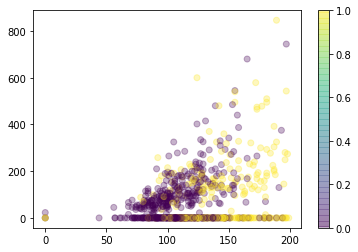

In [14]:
import matplotlib.pyplot as plt

plt.scatter(df["Glucose"],df["Insulin"], c=y, alpha=0.3, cmap='viridis')
plt.colorbar(); # show color scale

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)

In [17]:
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

In [20]:
names = ["Logistic Regression", "Linear SVM"]

classifiers = [LogisticRegression(),SVC(kernel="linear")]

In the code cell below, we instantiate the LogisticRegression classifier and we fit it to our training sets.

In [21]:
log_clf = LogisticRegression(max_iter = 150).fit(X_train, y_train)

log_clf.score(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.7621527777777778

In the code cell below, fill in the ellipsis with the name of the classifier we have imported for SVM.

In [22]:
svm_clf = SVC(random_state=0).fit(X_train, y_train)

svm_clf.score(X_train, y_train)

0.7586805555555556

In the code cell below, we have used the function predict() without the logistic regression classifier
log_clf to make a prediction on the y testing set.

In [23]:
y_eval_lr = log_clf.predict(X_test)

In [24]:
acc = sum(y_eval_lr == y_test) / float(len(y_test))

print("Accuracy: %.2f%%" % (100*acc))

Accuracy: 80.21%


Finally, we are interested in looking at the accuracy of the SVMs model. In the code cell below, compute the
prediction on the testing set (y_eval_svm) by following the code above.

In [25]:
y_eval_svm = svm_clf.predict(X_test)

Run the code cell below to compute the acuracy for this model.

In [26]:
acc = sum(y_eval_svm == y_test) / float(len(y_test))

print("Accuracy: %.2f%%" % (100*acc))

Accuracy: 77.08%
